In [ ]:
http://bit.ly/328YCR2

Downloading Our Data
In this specific tutorial we will be implementing the linear regression algorithm to predict students final grade based on a series of attributes. To do this we need some data!

We are going to be using the Student Performance data set from the UCI Machine Learning Repository. 

https://archive.ics.uci.edu/ml/machine-learning-databases/00320/

Description:
https://archive.ics.uci.edu/ml/datasets/Student+Performance

This data set consists of 33 attributes for each student. You can see a description of each attribute here. It is great that there is many attributes but we likely don't want to consider all of them when trying to predict a students grade. Therefore, we will trim this data set down so we only have the attributes we need.

# Importing Modules/Packages


 Before we start coding we should import all of the following.



In [4]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

### Loading in Our Data


Once you've downloaded the data set and placed it into your main directory you can load it in using the pandas module.

In [5]:
#csv stands for comma seterated values
#seperator sep =";"
data = pd.read_csv("student-mat.csv", sep=";")
print(data)
# Since our data is seperated by semicolons we need to do sep=";"

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
5       GP   M   16       U     LE3       T     4     3  services     other   
6       GP   M   16       U     LE3       T     2     2     other     other   
7       GP   F   17       U     GT3       A     4     4     other   teacher   
8       GP   M   15       U     LE3       A     3     2  services     other   
9       GP   M   15       U     GT3       T     3     4     other     other   
10      GP   F   15       U     GT3       T     4     4   teacher    health   
11      GP   F   15       U     GT3       T     2   

To see our data frame we can type:



In [6]:
print(data.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


This will print out the first 5 students in our data frame.



## Trimming Our Data


Since we have so many attributes and not all are relevant we need to select the ones we want to use. We can do this by typing the following.

In [7]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
print(data.head())

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


Now our data frame only has the information associated with those 6 attributes.



## Separating Our Data


Now that we've trimmed our data set down we need to separate it into 4 arrays. However, before we can do that we need to define what attribute we are trying to predict. This attribute is known as a label. The other attributes that will determine our label are known as features. Once we've done this we will use numpy to create two arrays. One that contains all of our features and one that contains our labels.

In [8]:
predict = "G3"
#i stands for y axis
X = np.array(data.drop([predict], 1)) # Features          #returns new dataframe 
print(X)
y = np.array(data[predict]) # Labels
print(y)

[[ 5  6  2  0  6]
 [ 5  5  2  0  4]
 [ 7  8  2  3 10]
 ...
 [10  8  1  3  3]
 [11 12  1  0  0]
 [ 8  9  1  0  5]]
[ 6  6 10 15 10 15 11  6 19 15  9 12 14 11 16 14 14 10  5 10 15 15 16 12
  8  8 11 15 11 11 12 17 16 12 15  6 18 15 11 13 11 12 18 11  9  6 11 20
 14  7 13 13 10 11 13 10 15 15  9 16 11 11  9  9 10 15 12  6  8 16 15 10
  5 14 11 10 10 11 10  5 12 11  6 15 10  8  6 14 10  7  8 18  6 10 14 10
 15 10 14  8  5 17 14  6 18 11  8 18 13 16 19 10 13 19  9 16 14 13  8 13
 15 15 13 13  8 12 11  9  0 18  0  0 12 11  0  0  0  0 12 15  0  9 11 13
  0 11  0 11  0 10  0 14 10  0 12  8 13 10 15 12  0  7  0 10  7 12 10 16
  0 14  0 16 10  0  9  9 11  6  9 11  8 12 17  8 12 11 11 15  9 10 13  9
  8 10 14 15 16 10 18 10 16 10 10  6 11  9  7 13 10  7  8 13 14  8 10 15
  4  8  8 10  6  0 17 13 14  7 15 12  9 12 14 11  9 13  6 10 13 12 11  0
 12 12  0 12  0 18 13  8  5 15  8 10  8  8 12  8 13 11 14  0 18  8 12  9
  0 17 10 11 10  0  9 14 11 14 10 12  9  9  8 10  8 10 12 10 11 11 19 12
 14 15 11 

After this we need to split our data into testing and training data. We will use 90% of our data to train and the other 10% to test. The reason we do this is so that we do not test our model on data that it has already seen.

In [9]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1,random_state=0)
print(x_train)

[[ 5  5  2  0  4]
 [18 18  4  0  6]
 [ 9  8  2  1 15]
 ...
 [13 14  1  0  0]
 [19 19  4  0  4]
 [13 11  2  0  0]]


## Training Multiple Models

You may have noticed that our models vary in accuracy. This is because when we split the data into training and testing data it is divided differently each time. Since our model trains very quickly it may be worth training multiple models and saving the best one. We can do this in the following way.

In [81]:
# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE


In [10]:
best = 0
for _ in range(100):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))
    # If the current model has a better score than one we've already trained then save it
    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

Accuracy: 0.8509777870627004
Accuracy: 0.7180127320612191
Accuracy: 0.7315864941579387
Accuracy: 0.771194792453368
Accuracy: 0.8033041558329231
Accuracy: 0.6873063372599347
Accuracy: 0.7650424421416003
Accuracy: 0.8220292410404553
Accuracy: 0.9170624993841396
Accuracy: 0.8363673972996214
Accuracy: 0.8218994467823265
Accuracy: 0.8119645107320005
Accuracy: 0.9232743035294322
Accuracy: 0.7453726008232917
Accuracy: 0.723397205362277
Accuracy: 0.6914825882201183
Accuracy: 0.9195722988138403
Accuracy: 0.6385686730913318
Accuracy: 0.9132201954965334
Accuracy: 0.7966646352244052
Accuracy: 0.831033967767134
Accuracy: 0.7748977441729568
Accuracy: 0.846655514798316
Accuracy: 0.8180033858934559
Accuracy: 0.7675926447030972
Accuracy: 0.747253395353392
Accuracy: 0.8966992822392172
Accuracy: 0.8441427951450975
Accuracy: 0.9244405066547009
Accuracy: 0.8653778675211282
Accuracy: 0.7933661298860186
Accuracy: 0.8295824239033882
Accuracy: 0.8159861884228933
Accuracy: 0.8043652086515335
Accuracy: 0.7033915

Now we are ready to implement the linear regression algorithm


This tutorial will be dedicated to understanding how the linear regression algorithm works and implementing it to make predictions using our data set.

### How Does it Work?

Linear Regression is essentially just a best fit line. Given a set of data the algorithm will create a best fit line through those data points.

https://techwithtim.net/wp-content/uploads/2019/01/linear-1.png

This line can be defined by the equation y = m*x + b.
m is the slope. Meaning how much the y value increases for each x value.

b is the y intercept. Where the line crosses the y axis.

We can determine the slope(m) of the line by picking two points on the line (p1 and p2) and using the following equation: m = (y2 - y1) / (x2 - x1)

Once the computer has generated this line it will use it to predict certain values.

Note: The examples above are done in 2D space. In reality most of our best fit lines will span across multiple dimensions and therefore will have multiple slope values.

### Implementing the Algorithm

Now that we understand how linear regression works we can use it to predict students final grades.

We will start by defining the model which we will be using.



In [9]:
linear = linear_model.LinearRegression()

Next we will train and score our model using the arrays we created in the previous tutorial.

In [10]:
linear.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
acc = linear.score(x_test, y_test) # acc stands for accuracy 

To see how well our algorithm performed on our test data we can print out the accuracy.



In [12]:
print(acc)


0.8443733244005991


### Saving Our Model

To save our model we will write to a new file using pickle.dump().



In [91]:
#wb write mode  ,  f stands for file
with open("studentgrades.pickle", "wb") as f:
    pickle.dump(linear, f)

# linear is the name of the model we created in the last tutorial
# it should be defined above this

For this specific data set a score of above 80% is fairly good.


### Viewing The Constants


If we want to see the constants used to generate the line we can type the following.



In [92]:
print('Coefficient: \n', linear.coef_) # These are each slope value
print('Intercept: \n', linear.intercept_) # This is the intercept

Coefficient: 
 [ 0.15285832  0.97199155 -0.22783581 -0.31108546  0.03634893]
Intercept: 
 -1.3213218714415191


### Predicting on Specific Students

Seeing a score value is cool but I'd like to see how well our algorithm works on specific students. To do this we are going to print out all of our test data. Beside this data we will print the actual final grade and our models predicted grade.

In [93]:
predictions = linear.predict(x_test) # Gets a list of all predictions
print(predictions)

[11.63567561  9.16125696 15.77470264 18.39532658 15.16845234  9.85219928
  3.60577905  7.97345145 19.25942875 12.53577886 20.03362073 16.44097756
 11.33304817 11.3018822  13.68208015  8.34437567 10.74175074  7.73815305
 12.30276008 11.93929847 13.69179469  9.31118424  6.58908273 10.08943698
  9.3913447  12.75390013 10.51619457 11.24979852 11.33760742  7.95022641
  5.04171437 14.94289616  6.88733677 -0.70698526  6.46790747  9.31118424
  3.9168645  13.47891176 12.02173855  8.47400894]


In [94]:
for x in range(len(predictions)):
    print(predictions[x],x_test[x],y_test[x])

11.635675608336822 [13 12  2  1  2] 12
9.16125695571338 [11  9  2  0 14] 9
15.774702643597376 [17 15  1  0  4] 16
18.395326583150542 [19 18  3  0  0] 19
15.168452340511227 [15 15  2  0  2] 16
9.852199282427827 [11 10  1  0  0] 10
3.6057790472217413 [6 5 1 2 0] 0
7.973451454348805 [10  8  1  0  6] 11
19.25942875448391 [18 18  1  1 24] 18
12.535778859025667 [13 13  4  0  4] 12
20.033620731083406 [18 19  1  0 10] 19
16.440977555151512 [15 16  1  0  4] 15
11.333048166446835 [10 12  3  0  4] 12
11.301882203219671 [12 12  4  0  1] 12
13.682080152274091 [13 13  2  0 23] 13
8.344375665262167 [10  9  3  0  2] 8
10.741750744222356 [11 11  2  0  4] 11
7.738153051823431 [ 9  8  2  0 10] 8
12.302760084839221 [11 13  4  0  6] 14
11.939298469532986 [12 12  2  0  6] 12
13.691794686572731 [12 14  3  0  7] 14
9.311184244725279 [ 8 10  2  0  4] 9
6.589082726780293 [8 8 1 3 2] 10
10.0894369763422 [10 10  2  0 17] 10
9.391344701323135 [ 9 10  2  0  2] 10
12.75390013164527 [14 12  2  0 20] 13
10.51619456564

In this tutorial we will be creating multiple models and saving ones that generate the best scores. We will also be plotting our data points to see a graphical representation of data correlation.

Installing Packages
In this tutorial we will need to install one more module called matplotlib. We will also be using the module pickle that does not need to be installed.

Similarly to before we will activate our environment using activate "environment name" and then type pip install matplotlib in the command prompt.

### Saving Our Model

To save our model we will write to a new file using pickle.dump().

### Loading Our Model

Once we've saved our model we can load it in using the following two lines. Now you can remove the code that creates and trains our model as we are simply loading in an existing one from our pickle file.

In [95]:
#rb stands for read mode
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

Now we can use linear to predict grades like before

## Plotting Our Data


To get a visual representation of our data we can plot it using the matplotlib library we installed earlier. We are going to use a scatter plot to visualize our data.



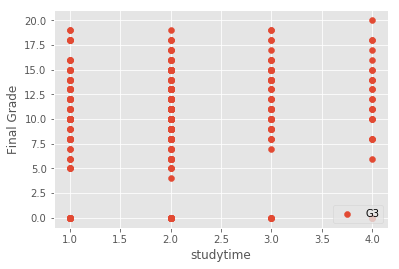

In [13]:
# Drawing and plotting model
plot = "studytime" # Change this to G1, G2, studytime or absences to see other graphs
style.use("ggplot")
plt.scatter(data[plot], data["G3"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

Accuracy: 0.7573383488733711
Accuracy: 0.814995442231909
Accuracy: 0.9030302896774295
Accuracy: 0.7164681105787252
Accuracy: 0.7915592584894876
Accuracy: 0.8814242936823805
Accuracy: 0.8096432986846539
Accuracy: 0.7495412686621666
Accuracy: 0.7121461203348313
Accuracy: 0.9082428231287795
Accuracy: 0.8522075316061357
Accuracy: 0.7996961996450915
Accuracy: 0.8797029635159638
Accuracy: 0.868681573039029
Accuracy: 0.8372751983648142
Accuracy: 0.8029982483260826
Accuracy: 0.8036575702576857
Accuracy: 0.6854836957175294
Accuracy: 0.8271870653659391
Accuracy: 0.724023405022862
-------------------------
Coefficient: 
 [ 0.16263628  0.96752199  0.04042923 -0.38807631 -0.17232091]
Intercept: 
 -1.517531921488077
-------------------------
4.548754334318992 [8 6 2 2 2] 5
12.19548032861314 [12 12  8  0  1] 12
8.227472922491197 [8 9 2 0 2] 8
17.015559753609082 [16 17  0  0  3] 17
5.047341556840689 [8 7 0 3 2] 0
8.318935365399339 [8 9 0 0 1] 8
12.748106023165931 [12 13  2  0  2] 13
8.308331386152917 

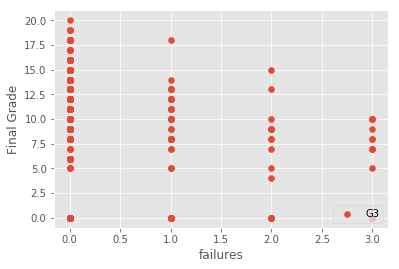

In [105]:
#Import Library
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use("ggplot")

data = pd.read_csv("student-mat.csv", sep=";")

predict = "G3"

data = data[["G1", "G2", "absences","failures", "studytime","G3"]]
data = shuffle(data) # Optional - shuffle the data

x = np.array(data.drop([predict], 1))
y =np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)


# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

# LOAD MODEL
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)


print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])


# Drawing and plotting model
plot = "failures"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()